In [11]:
pip install accelerate>=0.20.1

In [1]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
adapter-transformers 3.2.1 requires tokenizers!=0.11.3,<0.14,>=0.11.1, but you have tokenizers 0.15.0 which is incompatible.


# Token classification

In [2]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wVHdVlPScxA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Token classification assigns a label to individual tokens in a sentence. One of the most common token classification tasks is Named Entity Recognition (NER). NER attempts to find a label for each entity in a sentence, such as a person, location, or organization.

This guide will show you how to:

1. Finetune [DistilBERT](https://huggingface.co/distilbert-base-uncased) on the [WNUT 17](https://huggingface.co/datasets/wnut_17) dataset to detect new entities.
2. Use your finetuned model for inference.

<Tip>
The task illustrated in this tutorial is supported by the following model architectures:

<!--This tip is automatically generated by `make fix-copies`, do not fill manually!-->

[ALBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/albert), [BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bert), [BigBird](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/big_bird), [BioGpt](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/biogpt), [BLOOM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bloom), [CamemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/camembert), [CANINE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/canine), [ConvBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/convbert), [Data2VecText](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/data2vec-text), [DeBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta), [DeBERTa-v2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta-v2), [DistilBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/distilbert), [ELECTRA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/electra), [ERNIE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie), [ErnieM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie_m), [ESM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/esm), [FlauBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/flaubert), [FNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/fnet), [Funnel Transformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/funnel), [GPT-Sw3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt-sw3), [OpenAI GPT-2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt2), [GPTBigCode](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_bigcode), [GPT Neo](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neo), [GPT NeoX](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neox), [I-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ibert), [LayoutLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlm), [LayoutLMv2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv2), [LayoutLMv3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv3), [LiLT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/lilt), [Longformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/longformer), [LUKE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/luke), [MarkupLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/markuplm), [MEGA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mega), [Megatron-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/megatron-bert), [MobileBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mobilebert), [MPNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mpnet), [Nezha](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nezha), [Nyströmformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nystromformer), [QDQBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/qdqbert), [RemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/rembert), [RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta), [RoBERTa-PreLayerNorm](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta-prelayernorm), [RoCBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roc_bert), [RoFormer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roformer), [SqueezeBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/squeezebert), [XLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm), [XLM-RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta), [XLM-RoBERTa-XL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta-xl), [XLNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlnet), [X-MOD](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xmod), [YOSO](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/yoso)

<!--End of the generated tip-->

</Tip>

Before you begin, make sure you have all the necessary libraries installed:

```bash
pip install transformers datasets evaluate seqeval
```

We encourage you to login to your Hugging Face account so you can upload and share your model with the community. When prompted, enter your token to login:

In [3]:
from huggingface_hub import notebook_login

notebook_login()

## Load WNUT 17 dataset

Start by loading the WNUT 17 dataset from the 🤗 Datasets library:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from datasets import load_dataset, DatasetDict

# wnut_orig = load_dataset("wnut_17")
wnut = load_dataset("csv", data_files="/content/drive/MyDrive/DL/DL project /clinical-adapter-1/Data/concept_assertion_relation_training_data/concept_data_final.csv")

Then take a look at an example:

In [3]:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(wnut['train'], test_size=0.2, random_state=42)
# full_dataset = wnut['train']
# Split into train and test datasets
# train_data, test_data = full_dataset.train_test_split(test_size=0.2, seed=42)

# # Create a DatasetDict object
# dataset_dict = DatasetDict({"train": train_data, "test": test_data})


# Split the original dataset into train, validation, and test sets
train_test = wnut['train'].train_test_split(test_size=0.1)  # 10% of the data for testing

# Further split the training portion into train and validation
train_val = train_test['train'].train_test_split(test_size=0.1)  # 10% of the training data for validation

# Create the DatasetDict object
wnut = DatasetDict({
    "train": train_val['train'],
    "validation": train_val['test'],
    "test": train_test['test']
})

In [4]:
# wnut_orig

In [5]:
wnut

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags', 'ner_tags'],
        num_rows: 13214
    })
    validation: Dataset({
        features: ['tokens', 'tags', 'ner_tags'],
        num_rows: 1469
    })
    test: Dataset({
        features: ['tokens', 'tags', 'ner_tags'],
        num_rows: 1632
    })
})

In [6]:
wnut["train"][1]

{'tokens': "['The', 'patient', 'recovered', 'well', 'status', 'post', 'these', 'two', 'procedures', '.']",
 'tags': "['O', 'O', 'O', 'O', 'O', 'O', 'B-test', 'I-test', 'I-test', 'O']",
 'ner_tags': '[0, 0, 0, 0, 0, 0, 1, 2, 2, 0]'}

Each number in `NER_TAG` represents an entity. Convert the numbers to their label names to find out what the entities are:

In [7]:
# wnut_orig = load_dataset("wnut_17")
# label_list = wnut_orig["train"].features["ner_tags"].feature.names
# label_list
label_list = ["O", "B-test", "I-test", "B-problem", "I-problem", "B-treatment", "I-treatment"]

#don't know how to do this for our data

The letter that prefixes each `ner_tag` indicates the token position of the entity:

- `B-` indicates the beginning of an entity.
- `I-` indicates a token is contained inside the same entity (for example, the `State` token is a part of an entity like
  `Empire State Building`).
- `0` indicates the token doesn't correspond to any entity.

## Preprocess

In [ ]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/iY2AZYdZAr0?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


The next step is to load a DistilBERT tokenizer to preprocess the `tokens` field:

In [8]:
from transformers import AutoTokenizer, BertTokenizerFast
# from tokenizers import SentencePieceBPETokenizer
# sp_tokenizer = SentencePieceBPETokenizer("path/to/your/sentencepiece.model")
# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")   #bert
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT") # clinical BERT
# tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased", tokenizer_class=sp_tokenizer)

ImportError: ignored

As you saw in the example `tokens` field above, it looks like the input has already been tokenized. But the input actually hasn't been tokenized yet and you'll need to set `is_split_into_words=True` to tokenize the words into subwords. For example:

In [11]:

# example = wnut_orig["train"][0]
# example

In [12]:
# example

In [13]:
import ast

In [ ]:
example = wnut["train"][2]
tokenized_input = tokenizer(ast.literal_eval(example["tokens"]), is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
tokens

However, this adds some special tokens `[CLS]` and `[SEP]` and the subword tokenization creates a mismatch between the input and labels. A single word corresponding to a single label may now be split into two subwords. You'll need to realign the tokens and labels by:

1. Mapping all tokens to their corresponding word with the [`word_ids`](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.BatchEncoding.word_ids) method.
2. Assigning the label `-100` to the special tokens `[CLS]` and `[SEP]` so they're ignored by the PyTorch loss function.
3. Only labeling the first token of a given word. Assign `-100` to other subtokens from the same word.

Here is how you can create a function to realign the tokens and labels, and truncate sequences to be no longer than DistilBERT's maximum input length:

In [ ]:
def tokenize_and_align_labels(examples):
    examples_tokens = [ast.literal_eval(ele) for ele in examples["tokens"]]
    tokenized_inputs = tokenizer(examples_tokens, truncation=True, is_split_into_words=True)

    labels = []
    examples_ner= [ast.literal_eval(ele) for ele in examples[f"ner_tags"]]
    for i, label in enumerate(examples_ner):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to their respective word.
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the special tokens to -100.
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:  # Only label the first token of a given word.
                label_ids.append(label[word_idx])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

To apply the preprocessing function over the entire dataset, use 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map) function. You can speed up the `map` function by setting `batched=True` to process multiple elements of the dataset at once:

In [ ]:
type(wnut)

In [ ]:
tokenized_wnut = wnut.map(tokenize_and_align_labels, batched=True)

Now create a batch of examples using [DataCollatorWithPadding](https://huggingface.co/docs/transformers/main/en/main_classes/data_collator#transformers.DataCollatorWithPadding). It's more efficient to *dynamically pad* the sentences to the longest length in a batch during collation, instead of padding the whole dataset to the maximum length.

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

## Evaluate

Including a metric during training is often helpful for evaluating your model's performance. You can quickly load a evaluation method with the 🤗 [Evaluate](https://huggingface.co/docs/evaluate/index) library. For this task, load the [seqeval](https://huggingface.co/spaces/evaluate-metric/seqeval) framework (see the 🤗 Evaluate [quick tour](https://huggingface.co/docs/evaluate/a_quick_tour) to learn more about how to load and compute a metric). Seqeval actually produces several scores: precision, recall, F1, and accuracy.

In [ ]:
%pip install evaluate

In [ ]:
!pip install seqeval

In [9]:
import evaluate

seqeval = evaluate.load("seqeval")

Get the NER labels first, and then create a function that passes your true predictions and true labels to [compute](https://huggingface.co/docs/evaluate/main/en/package_reference/main_classes#evaluate.EvaluationModule.compute) to calculate the scores:

In [10]:

import numpy as np

labels = [label_list[i] for i in ast.literal_eval(example["ner_tags"])]


def compute_metrics(p):  #revisit
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

NameError: ignored

Your `compute_metrics` function is ready to go now, and you'll return to it when you setup your training.

## Train

Before you start training your model, create a map of the expected ids to their labels with `id2label` and `label2id`:

In [11]:
# id2label = {
#     0: "O",
#     1: "B-corporation",
#     2: "I-corporation",
#     3: "B-creative-work",
#     4: "I-creative-work",
#     5: "B-group",
#     6: "I-group",
#     7: "B-location",
#     8: "I-location",
#     9: "B-person",
#     10: "I-person",
#     11: "B-product",
#     12: "I-product",
# }
# label2id = {
#     "O": 0,
#     "B-corporation": 1,
#     "I-corporation": 2,
#     "B-creative-work": 3,
#     "I-creative-work": 4,
#     "B-group": 5,
#     "I-group": 6,
#     "B-location": 7,
#     "I-location": 8,
#     "B-person": 9,
#     "I-person": 10,
#     "B-product": 11,
#     "I-product": 12,
# }

id2label = {
    0: "O",
    1: "B-test",
    2: "I-test",
    3: "B-problem",
    4: "I-problem",
    5: "B-treatment",
    6: "I-treatment"
}

label2id = {
    "O": 0,
    "B-test": 1,
    "I-test": 2,
    "B-problem": 3,
    "I-problem": 4,
    "B-treatment": 5,
    "I-treatment": 6
}

<Tip>

If you aren't familiar with finetuning a model with the [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer), take a look at the basic tutorial [here](https://huggingface.co/docs/transformers/main/en/tasks/../training#train-with-pytorch-trainer)!

</Tip>

You're ready to start training your model now! Load DistilBERT with [AutoModelForTokenClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForTokenClassification) along with the number of expected labels, and the label mappings:

In [ ]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer, AutoTokenizer

# model = AutoModelForTokenClassification.from_pretrained(
#     "bert-base-uncased", num_labels=7, id2label=id2label, label2id=label2id
# )   #bert

model = AutoModelForTokenClassification.from_pretrained(
    "emilyalsentzer/Bio_ClinicalBERT", num_labels=7, id2label=id2label, label2id=label2id
)
# model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
# MODEL = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForTokenClassification.from_pretrained(MODEL, num_labels=len(all_labels))
# model = AutoModelForTokenClassification.from_pretrained(MODEL, num_labels=7, id2label=id2label, label2id=label2id)

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


At this point, only three steps remain:

1. Define your training hyperparameters in [TrainingArguments](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments). The only required parameter is `output_dir` which specifies where to save your model. You'll push this model to the Hub by setting `push_to_hub=True` (you need to be signed in to Hugging Face to upload your model). At the end of each epoch, the [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) will evaluate the seqeval scores and save the training checkpoint.
2. Pass the training arguments to [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) along with the model, dataset, tokenizer, data collator, and `compute_metrics` function.
3. Call [train()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.train) to finetune your model.

In [ ]:
# freeze all the parameters  #if full fine tuning, make it True
for param in model.parameters():
    param.requires_grad = True

In [ ]:
# pip install accelerate>=0.20.1

In [ ]:
# !pip show accelerate

In [ ]:
tokenized_wnut

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags', 'ner_tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 13214
    })
    validation: Dataset({
        features: ['tokens', 'tags', 'ner_tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1469
    })
    test: Dataset({
        features: ['tokens', 'tags', 'ner_tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1632
    })
})

In [ ]:
# learning_rate=2e-3

In [ ]:
# learning_rate

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_wnut_model",
    learning_rate=2e-6,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.002,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=True,
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_wnut["train"],
    eval_dataset=tokenized_wnut["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.778200,0.310879,0.547938,0.665989,0.601223,0.903608
2,0.248800,0.201300,0.679735,0.763550,0.719209,0.933690
3,0.195100,0.178329,0.738007,0.813008,0.773694,0.941500
4,0.155900,0.165702,0.761194,0.829268,0.793774,0.945838
5,0.134700,0.162946,0.773183,0.836043,0.803385,0.947863
6,0.123300,0.158891,0.785218,0.842141,0.812684,0.949237
7,0.115900,0.161604,0.774194,0.845528,0.808290,0.947285
8,0.110900,0.158333,0.790742,0.844851,0.816901,0.950322
9,0.102100,0.158335,0.792644,0.846883,0.818867,0.950756


In [ ]:
trainer.evaluate()

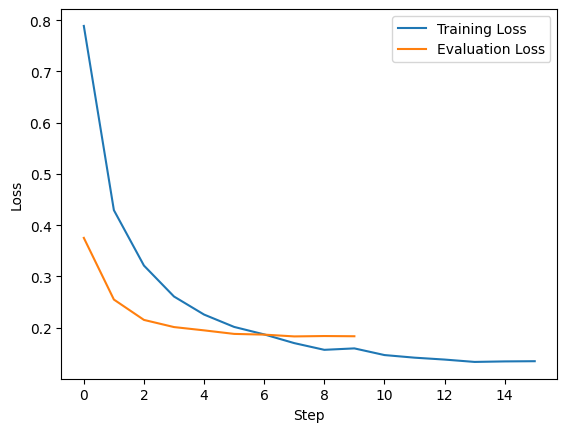

In [ ]:
import matplotlib.pyplot as plt

# Access the training logs
train_logs = trainer.state.log_history
train_losses = []
eval_losses = []

for log in train_logs:
    if 'loss' in log:
        train_losses.append(log['loss'])
    if 'eval_loss' in log:
        eval_losses.append(log['eval_loss'])

# Plotting
plt.plot(train_losses, label="Training Loss")
plt.plot(eval_losses, label="Evaluation Loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.legend()
plt.show()

Once training is completed, share your model to the Hub with the [push_to_hub()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.push_to_hub) method so everyone can use your model:

In [ ]:
# trainer.push_to_hub()

<Tip>

For a more in-depth example of how to finetune a model for token classification, take a look at the corresponding
[PyTorch notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/token_classification.ipynb)
or [TensorFlow notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/token_classification-tf.ipynb).

</Tip>

## Inference

Great, now that you've finetuned a model, you can use it for inference!

Grab some text you'd like to run inference on:

The simplest way to try out your finetuned model for inference is to use it in a [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline). Instantiate a `pipeline` for NER with your model, and pass your text to it:

In [ ]:
# ls /content/my_awesome_wnut_model

checkpoint-446/  model.safetensors        tokenizer_config.json  vocab.txt
checkpoint-892/  runs/                    tokenizer.json
config.json      special_tokens_map.json  training_args.bin


In [ ]:
# from transformers import pipeline

# classifier = pipeline("ner", model="stevhliu/my_awesome_wnut_model")
# classifier(text)

from transformers import pipeline
text = "Meclizine 25 mg po bid ."
classifier = pipeline("ner", model="/content/my_awesome_wnut_model")
result = classifier(text)
# print(result)
for r in result:
  print(r,"\n")

{'entity': 'B-treatment', 'score': 0.9950128, 'index': 1, 'word': 'me', 'start': 0, 'end': 2} 

{'entity': 'B-treatment', 'score': 0.8203749, 'index': 2, 'word': '##cl', 'start': 2, 'end': 4} 

{'entity': 'B-treatment', 'score': 0.6742245, 'index': 3, 'word': '##iz', 'start': 4, 'end': 6} 

{'entity': 'I-treatment', 'score': 0.91906804, 'index': 4, 'word': '##ine', 'start': 6, 'end': 9} 



You can also manually replicate the results of the `pipeline` if you'd like:

Tokenize the text and return PyTorch tensors:

In [ ]:
from transformers import AutoTokenizer
text = "Meclizine 25 mg po bid ."
tokenizer = AutoTokenizer.from_pretrained("/content/my_awesome_wnut_model")
inputs = tokenizer(text, return_tensors="pt")

In [ ]:
inputs

{'input_ids': tensor([[  101,  2033, 20464, 10993,  3170,  2423, 11460, 13433,  7226,  1012,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

Pass your inputs to the model and return the `logits`:

In [ ]:
from transformers import AutoModelForTokenClassification
import torch
model = AutoModelForTokenClassification.from_pretrained("/content/my_awesome_wnut_model")
with torch.no_grad():
    logits = model(**inputs).logits

Get the class with the highest probability, and use the model's `id2label` mapping to convert it to a text label:

In [ ]:
predictions = torch.argmax(logits, dim=2)
predicted_token_class = [model.config.id2label[t.item()] for t in predictions[0]]
predicted_token_class

['O',
 'B-treatment',
 'I-treatment',
 'I-treatment',
 'I-treatment',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [ ]:
# print(test_predictions[0])

In [ ]:
test_predictions = trainer.predict(tokenized_wnut["test"])
metrics = compute_metrics([test_predictions[0],test_predictions[1]])
print(metrics)

{'precision': 0.770962296004502, 'recall': 0.8282950423216445, 'f1': 0.7986009909647334, 'accuracy': 0.9454003522557919}


In [10]:
def combine_subwords(text, entities):

    curr_word = entities[0]['word']
    new_entities = [entities[0]['entity']]
    word_list=[]

    for i in range(1, len(entities)):
      if entities[i]['word'][0:2] == '##':
        curr_word += str(entities[i]['word'][2:])
      else:
        if curr_word:
          word_list.append(curr_word)
        curr_word=""
        word_list.append(entities[i]['word'])
        new_entities.append(entities[i]['entity'])

    return word_list, new_entities


# Example usage
text = "Meclizine 25 mg po bid ."
entities = [
    {'entity': 'B-treatment', 'score': 0.999782, 'index': 1, 'word': 'me', 'start': 0, 'end': 2},
    {'entity': 'I-treatment', 'score': 0.99756914, 'index': 2, 'word': '##clizine', 'start': 2, 'end': 9},
    {'entity': 'I-treatment', 'score': 0.999782, 'index': 1, 'word': 'dust', 'start': 0, 'end': 2},
    {'entity': 'O', 'word': '25', 'start': 10, 'end': 12},
    {'entity': 'O', 'word': 'mg', 'start': 13, 'end': 15},
    {'entity': 'O', 'word': 'po', 'start': 16, 'end': 18},
    {'entity': 'O', 'word': 'bid', 'start': 19, 'end': 22},
    {'entity': 'O', 'word': '.', 'start': 23, 'end': 24}
]

reconstructed_text, combined_entities = combine_subwords(text, entities)
print("Reconstructed Text:", reconstructed_text)
print("Combined Entities:", combined_entities)


Reconstructed Text: ['meclizine', 'dust', '25', 'mg', 'po', 'bid', '.']
Combined Entities: ['B-treatment', 'I-treatment', 'O', 'O', 'O', 'O', 'O']


Adapters

In [16]:
!pip install adapters

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 3.4 MB/s eta 0:00:00


In [15]:
pip install tokenizers==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.3/216.3 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Could not build wheels for tokenizers, which is required to install pyproject.toml-based projects


In [17]:
from transformers import BertConfig, AutoAdapterModel,AutoTokenizer

tokenizer_clinical_bio  = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT",model_max_length=150)
model_clinical_adapter = AutoAdapterModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT", num_labels=7, id2label=id2label, label2id=label2id)

model_clinical_adapter.add_adapter("i2b2-ner")
model_clinical_adapter.train_adapter("i2b2-ner")


ImportError: ignored

In [ ]:
import numpy as np
from transformers import TrainingArguments, AdapterTrainer, EvalPrediction

adaptraining_args = TrainingArguments(
    learning_rate=1e-4,
    evaluation_strategy="epoch",
    num_train_epochs=1,
    output_dir="./clinical_bert_adapter",
    overwrite_output_dir=True,
    # The next line is important to ensure the dataset labels are properly passed to the model
   # remove_unused_columns=False,
)


adaptrainer = AdapterTrainer(
    model=model_clinical_adapter,
    args=adaptraining_args,
    train_dataset=tokenized_wnut["train"],
    eval_dataset=tokenized_wnut["validation"],
    compute_metrics=compute_metrics,
)

In [ ]:
adaptrainer.train()

In [ ]:
model_clinical_adapter.save_all_adapters("./clinical_bert_adapter")